# **Introduction to Computer Vision. Lab 11. Single Object Localization**


## **Theory:**

**Single Object Localization:**
Single object localization refers to identifying the position of a single object within an image and drawing a bounding box around it. This is a critical task in computer vision, especially for applications like object detection, tracking, and autonomous driving.

**Convolutional Neural Networks (CNNs):**
- CNNs are well-suited for image data due to their ability to capture spatial hierarchies through convolutional layers.
- The same CNN architecture used for image classification can be adapted for localization by modifying the output layer to predict bounding box coordinates.

**Bounding Box Representation:**
- Bounding boxes can be represented by four values: $([x, y, w, h])$, where $((x, y))$ are the coordinates of the top-left corner, and $(w)$ and $(h)$ are the width and height of the box.

**Training for Localization:**
- The model needs to be trained with images annotated with bounding boxes.
- The loss function used for training can be Mean Squared Error (MSE), which measures the difference between the predicted and true bounding box coordinates.



## **Excercise 1: Use your already built convolutional neural network to perform single object localization, with the scheme described below**

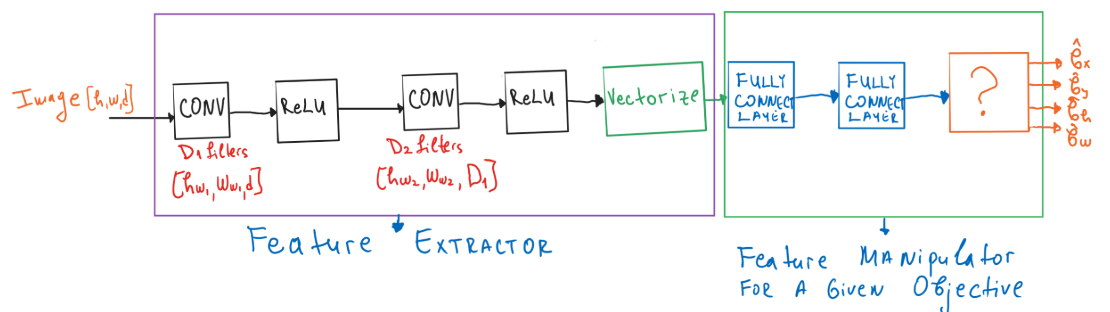

### Single Object Localization using Convolutional Neural Network

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import json
import os
import cv2
from sklearn.model_selection import train_test_split

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the Pikachu dataset (or use your own dataset)
def load_pikachu_data(data_dir):
    images = []
    bboxes = []
    annotations_path = os.path.join(data_dir, 'train', 'annotations.json')
    with open(annotations_path, 'r') as f:
        annotations = json.load(f)
    for ann in annotations['annotations']:
        img_path = os.path.join(data_dir, 'train', 'images', ann['file_name'])
        image = ''' TO DO '''
        image = ''' TO DO '''
        bbox = ann['bbox']
        images.append(image)
        bboxes.append(bbox)
    images = ''' TO DO '''
    bboxes = ''' TO DO '''
    return images, bboxes

# Load dataset
data_dir = 'path_to_pikachu_dataset'
X, y = load_pikachu_data(data_dir)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model for single object localization
def build_localization_model(input_shape):
    model = ''' TO DO '''
    model.add(''' TO DO ''')
    model.add(MaxPooling2D((2, 2)))
    model.add(''' TO DO ''')
    model.add(''' TO DO ''')
    model.add(''' TO DO ''')
    model.add(''' TO DO ''')
    model.add(''' TO DO ''')
    return model

# Build and compile the model
input_shape = (128, 128, 3)
model = build_localization_model(input_shape)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
batch_size = 32
epochs = 50
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')

# Assert that the final loss is within an acceptable range
assert loss < 0.02, f"Loss is too high: {loss}, expected less than 0.02"

# Predict bounding boxes on test images
predictions = model.predict(X_test)

# Assert the shape of the predictions
assert predictions.shape == y_test.shape, f"Prediction shape {predictions.shape} does not match expected shape {y_test.shape}"

# Function to draw bounding box on image
def draw_bbox(image, bbox):
    x, y, w, h = bbox
    x1, y1, x2, y2 = int(x), int(y), int(x + w), int(y + h)
    return cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Visualize predictions
import matplotlib.pyplot as plt

for i in range(5):
    image = X_test[i].copy()
    true_bbox = y_test[i]
    pred_bbox = predictions[i]
    image_true = draw_bbox(image.copy(), true_bbox)
    image_pred = draw_bbox(image.copy(), pred_bbox)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('True Bounding Box')
    plt.imshow(image_true)
    plt.subplot(1, 2, 2)
    plt.title('Predicted Bounding Box')
    plt.imshow(image_pred)
    plt.show()

# **Conclusion**

Using a convolutional neural network for single object localization involves adapting the output layer to predict bounding box coordinates and training the network with annotated images. This approach leverages the feature extraction capabilities of CNNs to accurately predict object locations within an image.